In [44]:
from model import DeepNeuralNetwork
from utils import load_2D_dataset
import matplotlib.pyplot as plt
import numpy as np

In [45]:
learning_rate = 0.3
layer_dims = np.array([2, 20, 3, 1])
num_iterations = 30000

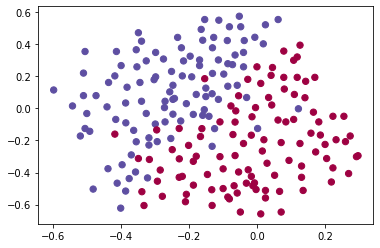

In [46]:
X_train, Y_train, X_test, Y_test = load_2D_dataset()

In [47]:
model = DeepNeuralNetwork(learning_rate, layer_dims, num_iterations)

In [48]:
model.fit(X_train, Y_train, True)

Cost after iteration 0: 0.6931470148937642
Cost after iteration 100: 0.6931355033596728
Cost after iteration 200: 0.6931352404932771
Cost after iteration 300: 0.6931348822501235
Cost after iteration 400: 0.693134392167157
Cost after iteration 500: 0.693133703179185
Cost after iteration 600: 0.6931327253148856
Cost after iteration 700: 0.6931312723274791
Cost after iteration 800: 0.6931290076485163
Cost after iteration 900: 0.6931252665182501
Cost after iteration 1000: 0.6931186655108343
Cost after iteration 1100: 0.6931059210240132
Cost after iteration 1200: 0.6930778750931568
Cost after iteration 1300: 0.6930027594997382
Cost after iteration 1400: 0.6927225980093482
Cost after iteration 1500: 0.6906240749122597
Cost after iteration 1600: 0.5754161102118773
Cost after iteration 1700: 0.26852550273128534
Cost after iteration 1800: 0.2438369703536203
Cost after iteration 1900: 0.23903692672180044
Cost after iteration 2000: 0.23717522291662133
Cost after iteration 2100: 0.2363319953932803

Cost after iteration 18400: 0.22115436703109906
Cost after iteration 18500: 0.22001955728117661
Cost after iteration 18600: 0.2203957200113618
Cost after iteration 18700: 0.22110844694259849
Cost after iteration 18800: 0.22087163624702405
Cost after iteration 18900: 0.2203595216243521
Cost after iteration 19000: 0.22116189185172536
Cost after iteration 19100: 0.221100104250671
Cost after iteration 19200: 0.21977522992799442
Cost after iteration 19300: 0.22033169033305397
Cost after iteration 19400: 0.21984055149835025
Cost after iteration 19500: 0.22040382217283386
Cost after iteration 19600: 0.22023607969594355
Cost after iteration 19700: 0.2197001623233631
Cost after iteration 19800: 0.22019878282453603
Cost after iteration 19900: 0.22023557049645753
Cost after iteration 20000: 0.22006861967447894
Cost after iteration 20100: 0.2193817333823689
Cost after iteration 20200: 0.21986117197345764
Cost after iteration 20300: 0.21916982443691987
Cost after iteration 20400: 0.2194193593416838

In [49]:
model.evaluate(X_train, Y_train)
model.evaluate(X_test, Y_test)


Accuracy: 92.89099526066352%
Accuracy: 94.0%


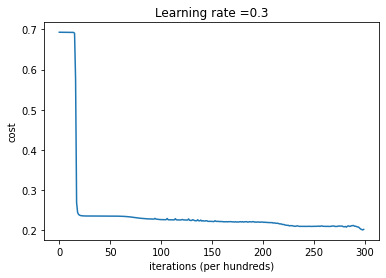

In [50]:
plt.plot(model.costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [51]:
layer_dims

array([ 2, 20,  3,  1])

In [52]:
model.parameters

{'W1': array([[ 1.20888325e+00, -8.49044295e-01],
        [-5.01667670e-01,  1.94024584e-01],
        [-5.67548301e+00, -2.88275845e-01],
        [-6.03521360e-01,  1.72846764e-01],
        [ 8.74566603e-03, -1.42737508e-03],
        [-6.25847349e-01,  7.61123756e-01],
        [-1.22915129e+00,  1.06035871e-01],
        [ 1.91478617e-01,  6.84802476e-02],
        [ 8.40070146e-01, -5.85192708e-01],
        [ 2.16336475e+00, -1.46925718e+00],
        [ 2.61757982e-01, -1.41611973e-01],
        [ 4.53331951e-01, -2.82030924e-01],
        [-9.39726112e-01,  1.05814364e+00],
        [ 4.43471009e-01, -3.17077529e-01],
        [-1.82675398e-01,  1.12831669e-01],
        [-6.23551707e-01,  3.72372538e-02],
        [-3.33273000e-01,  4.08899310e-01],
        [-4.35804148e-01, -6.07733830e-02],
        [ 7.83909729e-01, -6.22764846e-01],
        [ 1.11019564e+00, -7.81904533e-01]]),
 'b1': array([[ 0.40180185],
        [ 0.11033295],
        [-2.10269528],
        [ 0.1043298 ],
        [-0.00

In [53]:
model.predict(np.array([[1], [1]]))

Predict y: [[0.00040656]]


In [54]:
def predict_dec(model, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, _ = model.forward_propagation(X, model.parameters)
    predictions = (a3>0.5)
    return predictions

In [55]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

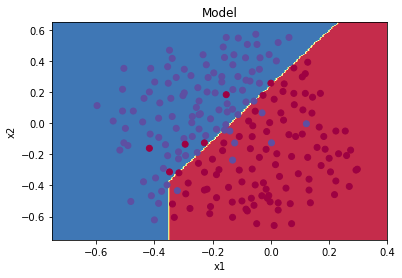

In [56]:
plt.title("Model")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(model, x.T), X_train, Y_train)